# MultiForest optimization notebook
# NORWAY

Above the code cells, there are short instructions how the users can modify the codes in the cells.<br>
If there are no instructions, no changes should be needed for the cell by default.

A detailed description is provided in the <b>README.md</b>.

## Basic definitions
Simulated forest data - name and climate scenario

In [1]:
RCP = "RCP45" # NDC scenario

Specify policy scenario:

- "NFS" -  National Forest Strategy
- "BDS" - Biodiversity Strategy
- "BES" - Bioeconomy Strategy

In [2]:
scenario ="BES"

Name definition for saved output, rule: _scenario_RCP_extension


In [3]:
extension = "Test_BottomUp" # some additional info to the saved output

## Specify "if" and "which" GLOBIOM scenario is used

<b>ATTENTION:</b> each scenario relates to specific CC simulation!<br>
Three scenarios define the perdiodic future demand for log, pulp/fuelwood, and forest residues.

<b>Bottom-up</b> 
* 1.5 degrees + RCP 0 (no CC) = <b>'globiom_1p5_RCP0'</b>
* NDC + RCP 4.5 = <b>'globiom_NDC_RCP45'</b>

<b>Top-down</b> - functions <b>WITH</b> assortment transfer
* 1.5 = <b>'globiom_1p5_RCP0_V2'</b>
* NDC = <b>'globiom_NDC_RCP45_V2'</b>

If <b>objectives_globiom = ' '</b>, no GLOBIOM demand objectives are considered.

In [4]:
objectives_globiom = 'globiom_1p5_RCP0' 

## Read .py class & data

In [8]:
import wget
import os
import numpy as np
import pandas as pd
import sys

In [9]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/py_class")

import multiFunctionalOptimizationNor as MFO

In [10]:
from importlib import reload
reload(MFO)

<module 'multiFunctionalOptimizationNor' from '/home/marta/smb/Skog_utmark/Landsskogtakseringen/51238_MultiForest/WP2/Repository/Copy no permiss/MultiForestDemonstration-master/EUclimate_vs_natPolicy_NOR/EUclimate_vs_natPolicy_NOR/multiFunctionalOptimizationNor.py'>

In [6]:
mfo = MFO.MultiFunctionalOptimization(solver = 'CPLEX')

'Using CPLEX'

<b>You need to "unrar" the file testData.rar first</b>

In [12]:
filename = "testData.csv"
filename

'testData.csv'

In [13]:
filename

'testData.csv'

In [14]:
%%time
mfo.readData(filename,standsEnu = "plot_id",delimeter = ",",
             areaCol = "tsd_ha2total", 
             sampleRatio=1) #If no sample ratio given, the ratio is assumed to be 1
                             #0.2 means 20% of the data

CPU times: user 992 ms, sys: 851 ms, total: 1.84 s
Wall time: 2.03 s


In [15]:
mfo.data.columns

Index(['plot_id', 'year', 'regime', 'period', 'pulp_vol_m3',
       'harv_cost_nok_m3', 'harv_cost_u150', 'harv_cost_u200',
       'net_increment_m3', 'is_old', 'is_broadleave', 'MiS_classified_plot',
       'bilberry_cover_pr', 'GROT_kt_TotNor', 'vol_saw_m3', 'saw_CO2_t',
       'vol_panels_m3', 'panels_CO2_t', 'albedo', 'is_steep_terrain',
       'is_vernskog', 'is_city_forest', 'shan', 'class_dbh', 'ha2total',
       'management', 'harv_net_Mnok_TotNor', 'harv_vol_Mm3_TotNor',
       'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor', 'dead_vol_Mm3_TotNor',
       'tsd_ha2total', 'CO2_forest_Mil_Kt_TotNor',
       'CO2_forest_Mil_Kt_TotNor_no_albedo', 'saw_CO2_change_Kt_TotNor',
       'saw_CO2_Kt_TotNor', 'panels_CO2_change_Kt_TotNor', 'HWP_C02_TotNor',
       'Bilberry_ha_TotNor', 'MiS_ha', 'SawTimber_Mm3_year', 'pulp_Mm3_year',
       'GROT_t', 'GROT_m3', 'GROT_Mm3', 'Residues_Mm3_year',
       'harvest_demands_Mm3_year', 'regime.class', 'finalFelling', 'is_CCF',
       'is_nomanagement

In [16]:
mfo.finalizeData(initialTime = 2023)

In [17]:
mfo.initialData.head()

period   pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                       
A03187-1 2023 SimOpt_extensive_0      t1  35612.018505        909.320021   
              SimOpt_extensive_1      t1      0.000000          0.000000   
              SimOpt_extensive_10     t1      0.000000          0.000000   
              SimOpt_extensive_11     t1      0.000000          0.000000   
              SimOpt_extensive_12     t1      0.000000          0.000000   

                                   harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                
A03187-1 2023 SimOpt_extensive_0                0               0   
              SimOpt_extensive_1                0               0   
              SimOpt_extensive_10               0               0   
              SimOpt_extensive_11               0               0   
              SimOpt_extensive_12               0               0   

                                   net_increment_m3  is_old  is_broadleave  \
plot_id  year regime                                                         
A03187-1 2023 SimOpt_extensive_0        2195.434622       0              0   
              SimOpt_extensive_1        4592.344651       0              0   
              SimOpt_extensive_10       4592.344651       0              0   
              SimOpt_extensive_11       4592.344651       0              0   
              SimOpt_extensive_12       4592.344651       0              0   

                                   MiS_classified_plot  bilberry_cover_pr  \
plot_id  year regime                                                        
A03187-1 2023 SimOpt_extensive_0                     0                  2   
              SimOpt_extensive_1                     0                  4   
              SimOpt_extensive_10                    0                  4   
              SimOpt_extensive_11                    0                  4   
              SimOpt_extensive_12                    0                  4   

                                   ...  Relative_albedo  Relative_shan  \
plot_id  year regime               ...                                   
A03187-1 2023 SimOpt_extensive_0   ...         0.000519       0.000000   
              SimOpt_extensive_1   ...         0.000458       0.000202   
              SimOpt_extensive_10  ...         0.000458       0.000202   
              SimOpt_extensive_11  ...         0.000458       0.000202   
              SimOpt_extensive_12  ...         0.000458       0.000202   

                                   Relative_ha2total  \
plot_id  year regime                                   
A03187-1 2023 SimOpt_extensive_0            0.000266   
              SimOpt_extensive_1            0.000266   
              SimOpt_extensive_10           0.000266   
              SimOpt_extensive_11           0.000266   
              SimOpt_extensive_12           0.000266   

                                   Relative_dead_vol_Mm3_TotNor  \
plot_id  year regime                                              
A03187-1 2023 SimOpt_extensive_0                            0.0   
              SimOpt_extensive_1                            0.0   
              SimOpt_extensive_10                           0.0   
              SimOpt_extensive_11                           0.0   
              SimOpt_extensive_12                           0.0   

                                   Relative_tsd_ha2total  \
plot_id  year regime                                       
A03187-1 2023 SimOpt_extensive_0                0.000266   
              SimOpt_extensive_1                0.000266   
              SimOpt_extensive_10               0.000266   
              SimOpt_extensive_11               0.000266   
              SimOpt_extensive_12               0.000266   

                                   Relative_CO2_forest_Mil_Kt_TotNor  \
plot_id  year regime                                   

In [18]:
mfo.data.head()

period  pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                      
A03187-1 2028 SimOpt_extensive_0      t2      0.00000          0.000000   
              SimOpt_extensive_1      t2  32727.61897        909.320021   
              SimOpt_extensive_10     t2      0.00000          0.000000   
              SimOpt_extensive_11     t2      0.00000          0.000000   
              SimOpt_extensive_12     t2      0.00000          0.000000   

                                   harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                
A03187-1 2028 SimOpt_extensive_0                0               0   
              SimOpt_extensive_1                0               0   
              SimOpt_extensive_10               0               0   
              SimOpt_extensive_11               0               0   
              SimOpt_extensive_12               0               0   

                                   net_increment_m3  is_old  is_broadleave  \
plot_id  year regime                                                         
A03187-1 2028 SimOpt_extensive_0           0.000000       0              0   
              SimOpt_extensive_1        2810.612023       0              0   
              SimOpt_extensive_10       3994.338879       0              0   
              SimOpt_extensive_11       3994.338879       0              0   
              SimOpt_extensive_12       3994.338879       0              0   

                                   MiS_classified_plot  bilberry_cover_pr  \
plot_id  year regime                                                        
A03187-1 2028 SimOpt_extensive_0                     0                  2   
              SimOpt_extensive_1                     0                  2   
              SimOpt_extensive_10                    0                  4   
              SimOpt_extensive_11                    0                  4   
              SimOpt_extensive_12                    0                  4   

                                   ...  Relative_Relative_albedo  \
plot_id  year regime               ...                             
A03187-1 2028 SimOpt_extensive_0   ...              9.025961e-07   
              SimOpt_extensive_1   ...              9.025961e-07   
              SimOpt_extensive_10  ...              7.912492e-07   
              SimOpt_extensive_11  ...              7.912492e-07   
              SimOpt_extensive_12  ...              7.912492e-07   

                                   Relative_Relative_shan  \
plot_id  year regime                                        
A03187-1 2028 SimOpt_extensive_0             0.000000e+00   
              SimOpt_extensive_1             0.000000e+00   
              SimOpt_extensive_10            2.396545e-07   
              SimOpt_extensive_11            2.396545e-07   
              SimOpt_extensive_12            2.396545e-07   

                                   Relative_Relative_ha2total  \
plot_id  year regime                                            
A03187-1 2028 SimOpt_extensive_0                 4.010508e-07   
              SimOpt_extensive_1                 4.010508e-07   
              SimOpt_extensive_10                4.010508e-07   
              SimOpt_extensive_11                4.010508e-07   
              SimOpt_extensive_12                4.010508e-07   

                                   Relative_Relative_dead_vol_Mm3_TotNor  \
plot_id  year regime                                                       
A03187-1 2028 SimOpt_extensive_0                            0.000000e+00   
              SimOpt_extensive_1                            0.000000e+00   
              SimOpt_extensive_10                           2.977858e-08   
              SimOpt_extensive_11                           2.977858e-08   
              SimOpt_extensive_12                           2.977858e-08   

                                   Relative

## GLOBIOM - Bottom-up

Read the targeted timber demands.


In [19]:
# -----------
# 1.5 degree scenario; matches with RCP0 (no CC)
# -----------
if objectives_globiom == 'globiom_1p5_RCP0':
    
    demands = pd.read_csv('NOR_globiom1p5_all.csv') 

    print("used 1p5")

    
# ----------- 
# NDC scenario, matches with RCP 4.5
# -----------
elif objectives_globiom == 'globiom_NDC_RCP45':
    
    demands = pd.read_csv('NOR_globiomNDC_all.csv') 

    print("used NDC") 


used 1p5


In [20]:
if objectives_globiom == 'globiom_1p5_RCP0' or objectives_globiom =='globiom_NDC_RCP45' :
    
    sawlog = demands["GSawlog"] 
    sawlog = sawlog.to_list()
    
    pulpfuel = demands["GPulpFuel"] 
    pulpfuel = pulpfuel.to_list()

    residues = demands["GResidues"] 
    residues = residues.to_list()
    
    globiom = {
    # --------------
    # Sawlogs, millions m3/year under bark
    # --------------
    # max_periodicTargets_Sum_Objective
    "Total_Harvested_V_log_GLOBIOM" : ["GLOBIOM, total Sawlogs (m3/year, u. bark)",
                        "SawTimber_Mm3_year",
                        "max", "periodicTargets", "sum", sawlog],
    
    # --------------
    # Pulpwood (relates to pulp and fuelwood of GLOBIOM), millions m3/year under bark
    # --------------
    "Total_Harvested_V_pulp_GLOBIOM" : ["GLOBIOM, total Pulpwood (m3/year, u. bark)",
                        "pulp_vol_Mm3_TotNor",
                        "max", "periodicTargets", "sum", pulpfuel],
    
    # --------------
    # Biomass (relates to forest residues of GLOBIOM),  millions m3/year 
    # --------------
    "Total_Biomass_GLOBIOM" : ["GLOBIOM, total Biomass (m3/year)",
                        "Residues_Mm3_year",
                        "max", "periodicTargets", "sum", residues] 
    }
    print("GLOBIOM Bottom-up loaded") 

else:
    globiom = {}
    print("no demands considered")

GLOBIOM Bottom-up loaded


## Define the optimization problem for policy scenarios
See README.md for details.

<b>Objective format:</b>

Unique_key :[Long human readable name, column name in data, max/min objective, year wise aggregation, stand wise aggregation (, target year )]

1) "Unique_key" : [ (2) "Long human readable name", (3) "column name", (4) "max/min objective", (5) "year wise aggregation", (6) "stand wise aggregation" (, (7) target year ) ]

<b>Options for "objective":</b> "max"imise or "min"imise it <br>
<b>year wise aggregation:</b> "min" (minimum value), "average", "firstYear", "targetYearWithSlope","targetYear","lastYear" <br>
<b>stand wise aggregation:</b> "sum", "areaWeightedAverage", "areaWeightedSum" <br>
<b>targe yeart:</b> any year except the first one


## Objectives

### NFS - Forest Strategy

In [21]:
if scenario == 'NFS':
    
    wood_production_bionergy = {
    # harvest net value - maximise
      "harvest_netvalue_Mnok_min": ["Maximize netvalue (MAX Millions nok/m2) min",
                                    "harv_net_Mnok_TotNor",
                                    "max","min","sum"],
        
    # GROT in plots with cost under 150 NOK   - maximise
     "GROTIncreaseInHarvCost150":["Maximize GROT in plots with harvest cost under 150 (maX)",
                                  "GROT_kt_TotNor", 
                                  "max","min","subsetSum","harv_cost_u150"],
    }
    
    Biodiversity = {
    # MIS area  - maximise
    "MiSIncrease":["Not decreasing area of MiS classified plots (not decrease)",
                   "Relative_MiS_ha", 
                   "max","min","sum"],
    }
    
    Climate_regulation = {
    # C02 in wooden products  - maximise
    "CO2_HWP_increase":["CO2_HWPMinimum yearly increase  (maximize",
                        "HWP_C02_TotNor",
                        "max","minYearlyIncrease","sum"],

    "CO2_HWP_kt": ["Co2 storage in wooden products (maximize kilotonnnes over all years)",
                   "HWP_C02_TotNor", 
                   "max","average","sum"],
    }
    
    objectives = {
        **globiom,
        **wood_production_bionergy,
        **Biodiversity,
        **Climate_regulation,
    }
    
    print("objectives for NFS loaded")

### BDS - Biodiversity Strategy

In [22]:
if scenario == 'BDS':
    
    wood_production_bionergy = {
        
    # harvest volume - maximise    
    "Average_Harvested_V": ["Avergare harvested timber volume (m3 ha, evenflow) ",
                            "harv_vol_Mm3_TotNor",
                             "max","min","areaWeightedAverage"], 
    }
    
    
    Biodiversity = {
       
    # MIS area  - no decline
    "MiSIncrease":["Not decreasing area of MiS classified plots (max)",
                   "MiS_ha", 
                   "max","minYearlyIncrease","sum"],
        
    # MIS area  - maximise
    "MiSMaxMin":["Not decreasing area of MiS classified plots (max)",
                 "Relative_MiS_ha", 
                 "max","min","sum"],
        
    # deadWood  - no decline
    "deadWoodIncrease":["Minimum yearly incrase in vol Millions m3 of dead wood (max)",
                        "dead_vol_Mm3_TotNor",
                        "max","minYearlyIncrease","sum"],
    # deadWood  - maximise   
    "deadWoodMaxMin":["Minimum yearly incrase in vol Millions m3 of dead wood (max)",
                      "Relative_dead_vol_Mm3_TotNor",
                      "max","min","sum"],
        
    # blueberry - no decline
    "blueberryIncrease":["Minimum yearly incrase in area of blueberry cover(max)",
                         "bilberry_cover_pr",
                         "max","minYearlyIncrease","areaWeightedSum"],
        
    # blueberry  - maximise  
    "blueberryMaxMin":["MaxMin in area of blueberry cover (max)",
                       "Relative_Bilberry_ha_TotNor",
                       "max","min","sum"],
    }
    
    
    Erosion_and_water = {
    # decrease harvest in protected areas and in steep terrain - minimize
    "Decrease_harv_in_vernskog_or_steep": ["Decrease harvest in verskog ha harvested(minimize ha over all years)",
                                              "FinaL_versk",
                                              "min","max","areaWeightedSum"],
    }
    
    Recreation = {
    # harvest in cityForest plot - minimize
    "harvest_in_cityForest": ["MinSum city forest (not decreasing)", 
                              "FinaL_city",
                              "min", "max", "areaWeightedSum"],
    # plots with high Shann - maximize
    "ShannonIncrease":["MAxMin Shanon in plots with larger dbh (not decrease)",
                       "Relative_Sha_highclassdbh_Tot_Nor", 
                       "max", "min","sum"] ,
  } 
        
    objectives = {
        **globiom,
        **wood_production_bionergy,
        **Biodiversity,
        **Erosion_and_water,
        **Recreation,
    }
    
    print("objectives for BDS loaded")

### BES - Bioeconomy Strategy

In [23]:
if scenario == 'BES':
    
    
    wood_production_bionergy = {
    # harvest net value - maximise
      "harvest_netvalue_Mnok_min": ["Maximize netvalue (MAX Millions nok/m2) min",
                                    "harv_net_Mnok_TotNor",
                                    "max","min","sum"],
        
    # GROT in plots with cost under 150 NOK   - maximise
     "GROTIncreaseInHarvCost150":["Maximize GROT in plots with harvest cost under 150 (maX)",
                                  "GROT_kt_TotNor", 
                                  "max","min","subsetSum","harv_cost_u150"],
        
    }
    
    Biodiversity = {
        
    # MIS area  - maximise
    "MiSMaxMin":["Not decreasing area of MiS classified plots (max)",
                 "Relative_MiS_ha", 
                 "max","min","sum"],
        
    }
    
    Climate_regulation = {
    # C02 in wooden products  - maximise
    "CO2_HWP_kt": [" Max Co2 storage in wooden products (maximize kt over all years)",
                   "HWP_C02_TotNor", 
                   "max","average","sum"],
    
    "CO2_in_forest": [" Max Co2 uptake in forest",
                      "CO2_forest_Mil_Kt_TotNor",
                      "max","sum","sum"],
    }
    
    
    Recreation = {
    # harvest in cityForest plot - minimize
    "harvest_in_cityForest": ["MinSum city forest (not decreasing)", 
                              "FinaL_city",
                              "min", "sum", "areaWeightedSum"],
    # plots with high Shann - maximize
    "ShannonIncrease":["MAxMin Shanon in plots with larger dbh (not decrease)",
                       "Relative_Sha_highclassdbh_Tot_Nor", 
                       "max", "min","sum"] ,
  } 
        
    objectives = {
        **globiom,
        **wood_production_bionergy,
        **Biodiversity,
        **Climate_regulation,
        **Recreation,
    }
    
    print("objectives for BES loaded")

objectives for BES loaded


In [24]:
len(objectives)

10

In [25]:
len(objectives)

10

In [26]:
objectives.keys()

dict_keys(['Total_Harvested_V_log_GLOBIOM', 'Total_Harvested_V_pulp_GLOBIOM', 'Total_Biomass_GLOBIOM', 'harvest_netvalue_Mnok_min', 'GROTIncreaseInHarvCost150', 'MiSMaxMin', 'CO2_HWP_kt', 'CO2_in_forest', 'harvest_in_cityForest', 'ShannonIncrease'])

In [27]:
mfo.data.columns

Index(['period', 'pulp_vol_m3', 'harv_cost_nok_m3', 'harv_cost_u150',
       'harv_cost_u200', 'net_increment_m3', 'is_old', 'is_broadleave',
       'MiS_classified_plot', 'bilberry_cover_pr', 'GROT_kt_TotNor',
       'vol_saw_m3', 'saw_CO2_t', 'vol_panels_m3', 'panels_CO2_t', 'albedo',
       'is_steep_terrain', 'is_vernskog', 'is_city_forest', 'shan',
       'class_dbh', 'ha2total', 'management', 'harv_net_Mnok_TotNor',
       'harv_vol_Mm3_TotNor', 'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor',
       'dead_vol_Mm3_TotNor', 'tsd_ha2total', 'CO2_forest_Mil_Kt_TotNor',
       'CO2_forest_Mil_Kt_TotNor_no_albedo', 'saw_CO2_change_Kt_TotNor',
       'saw_CO2_Kt_TotNor', 'panels_CO2_change_Kt_TotNor', 'HWP_C02_TotNor',
       'Bilberry_ha_TotNor', 'MiS_ha', 'SawTimber_Mm3_year', 'pulp_Mm3_year',
       'GROT_t', 'GROT_m3', 'GROT_Mm3', 'Residues_Mm3_year',
       'harvest_demands_Mm3_year', 'regime.class', 'finalFelling', 'is_CCF',
       'is_nomanagement', 'is_vers_or_ste', 'FinaL_versk', 

In [28]:
mfo.defineObjectives(objectives)

'Defining objectives'

'Aggregating stand wise'

100%|██████████| 10/10 [01:30<00:00,  9.01s/it]


'Aggregating year wise'

100%|██████████| 10/10 [00:00<00:00, 5118.13it/s]


'Objectives added'

## GLOBIOM - Top-down (with option for assortment transfer)

<b>Attention: Has to be run after defining the objectives!</b>

Read the targeted timber demands. 

In [29]:
# -----------
# 1.5 degree scenario; matches with RCP0 (no CC)
# -----------
if objectives_globiom == 'globiom_1p5_RCP0_V2':
    
    demands = pd.read_csv('NOR_globiom1p5_all.csv') 

    print("used 1p5")
    
# ----------- 
# NDC scenario, matches with RCP 4.5
# -----------
elif objectives_globiom == 'globiom_NDC_RCP45_V2':
    
    demands = pd.read_csv('NOR_globiomNDC_all.csv') 

    print("used NDC")

In [30]:
if objectives_globiom == 'globiom_1p5_RCP0_V2' or  objectives_globiom =='globiom_NDC_RCP45_V2' :
    
    sawlog = demands["GSawlog"] # divided by the number of provinces for test data
    sawlog = sawlog.to_list()
    
    pulpfuel = demands["GPulpFuel"] 
    pulpfuel = pulpfuel.to_list()

    residues = demands["GResidues"] 
    residues = residues.to_list()
    
    mfo.addGlobiomTargets(
        {
        "log": sawlog,
        "pulp": pulpfuel,
        "residues": residues
        },
        {
            #Log is converted primarily into log, and sencondary into pulp; no transferrate, both are volumes under bark
            "SawTimber_Mm3_year":
                {"log":[1,"primary"],"pulp":[1,"secondary"], "residues":[1.136,"secondary"]},
                #{"log":[1,"primary"],"pulp":[1,"secondary"]}, 
                                          
            # Pulp is converted primarily into pulp, and sencondary into residues; 
            # with transferrate 1.136, because pulp volume is under bark, residues are over bark (barkfactor = 1.136)  
            "pulp_vol_Mm3_TotNor":
                {"pulp":[1,"primary"], "residues":[1.136,"secondary"]}, 
            
            "Residues_Mm3_year":
                {"residues":[1,"primary"]} #Biomass only to residues
        }, 
        
        # ----------------
        # by default exactMatching is FALSE
        # ----------------
        # Functionality was implemented for Norway and their nationl policy scenarios
        # NOT required for Cross-scale analysis V2
        exactMatching=False 
        
    )
    
    print("GLOBIOM Top-down loaded") 

else:
    globiom = {}
    print("no demands considered")

no demands considered


## Define Enabled Constrains

In [31]:
constraints = {
    "TotalpulpDec": ["Species reduction",
                   "Max harvest reduction 10%", "pulp_Mm3_year",1, 0.10], 
    
    "TotalPulpIncre": ["Species increase",
                   "Max pulp increase", "pulp_Mm3_year",1, 0.40],

}

In [32]:
mfo.defineConstraints(constraints)

'Species increase'

## Calculate objective ranges
The ideal and anti-ideal solution for the individual objective functions.

## Calculate objective ranges

In [33]:
mfo.data

period  pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                          
A03187-1 2028 SimOpt_extensive_0          t2      0.00000          0.000000   
              SimOpt_extensive_1          t2  32727.61897        909.320021   
              SimOpt_extensive_10         t2      0.00000          0.000000   
              SimOpt_extensive_11         t2      0.00000          0.000000   
              SimOpt_extensive_12         t2      0.00000          0.000000   
...                                      ...          ...               ...   
H08221-0 2093 SimOpt_extensive_long_0    t15      0.00000          0.000000   
              SimOpt_no_management_0     t15      0.00000          0.000000   
         2098 SimOpt_extensive_0         t16      0.00000          0.000000   
              SimOpt_extensive_long_0    t16      0.00000          0.000000   
              SimOpt_no_management_0     t16      0.00000          0.000000   

                                       harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                    
A03187-1 2028 SimOpt_extensive_0                    0               0   
              SimOpt_extensive_1                    0               0   
              SimOpt_extensive_10                   0               0   
              SimOpt_extensive_11                   0               0   
              SimOpt_extensive_12                   0               0   
...                                               ...             ...   
H08221-0 2093 SimOpt_extensive_long_0               0               0   
              SimOpt_no_management_0                0               0   
         2098 SimOpt_extensive_0                    0               0   
              SimOpt_extensive_long_0               0               0   
              SimOpt_no_management_0                0               0   

                                       net_increment_m3  is_old  \
plot_id  year regime                                              
A03187-1 2028 SimOpt_extensive_0               0.000000       0   
              SimOpt_extensive_1            2810.612023       0   
              SimOpt_extensive_10           3994.338879       0   
              SimOpt_extensive_11           3994.338879       0   
              SimOpt_extensive_12           3994.338879       0   
...                                                 ...     ...   
H08221-0 2093 SimOpt_extensive_long_0          0.000000       0   
              SimOpt_no_management_0      -25382.949604       0   
         2098 SimOpt_extensive_0          142467.765186       0   
              SimOpt_extensive_long_0          0.000000       0   
              SimOpt_no_management_0       18267.237080       0   

                                       is_broadleave  MiS_classified_plot  \
plot_id  year regime                                                        
A03187-1 2028 SimOpt_extensive_0                   0                    0   
              SimOpt_extensive_1                   0                    0   
              SimOpt_extensive_10                  0                    0   
              SimOpt_extensive_11                  0                    0   
              SimOpt_extensive_12                  0                    0   
...                                              ...                  ...   
H08221-0 2093 SimOpt_extensive_long_0              0                    0   
              SimOpt_no_management_0               0                    0   
         2098 SimOpt_extensive_0                   1                    1   
              SimOpt_extensive_long_0              0                    0   
              SimOpt_no_management_0               0                    0   

                                       bilberry_cover_pr  ...  \
plot_id  year regime                                      ...   
A03187-1 2028 SimOpt_extensive_0                       2

In [34]:
%%time
mfo.calculateObjectiveRanges(debug=True)

'Calculating objective ranges'

  0%|          | 0/10 [00:00<?, ?it/s]

'Optimizing for GLOBIOM, total Sawlogs (m3/year, u. bark)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.6748014954544629

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.192355882298762

'GLOBIOM, total Biomass (m3/year)'

-0.8569797721755001

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

34378.14454533115

' Max Co2 uptake in forest'

-177.11314184189916

'MinSum city forest (not decreasing)'

315.7036713999999

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 10%|█         | 1/10 [00:05<00:51,  5.76s/it]

'Optimizing for GLOBIOM, total Pulpwood (m3/year, u. bark)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.8519474468454835

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

0.6671157874680896

'GLOBIOM, total Biomass (m3/year)'

-0.8440751944756721

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

43188.98086739789

' Max Co2 uptake in forest'

-136.94863204997165

'MinSum city forest (not decreasing)'

305.2890878176834

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 20%|██        | 2/10 [00:11<00:46,  5.86s/it]

'Optimizing for GLOBIOM, total Biomass (m3/year)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9535017347350925

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.5042784008412957

'GLOBIOM, total Biomass (m3/year)'

-0.42642007422305034

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

36408.94306278058

' Max Co2 uptake in forest'

-105.0285045861463

'MinSum city forest (not decreasing)'

284.9714555993133

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 30%|███       | 3/10 [00:18<00:42,  6.05s/it]

'Optimizing for Maximize netvalue (MAX Millions nok/m2) min'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.7674419841577858

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.3927492502280425

'GLOBIOM, total Biomass (m3/year)'

-0.8841522864339741

'Maximize netvalue (MAX Millions nok/m2) min'

4501.22647772364

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

30630.755447359632

' Max Co2 uptake in forest'

-72.55139646414241

'MinSum city forest (not decreasing)'

277.9787803301538

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 40%|████      | 4/10 [00:24<00:36,  6.01s/it]

'Optimizing for Maximize GROT in plots with harvest cost under 150 (maX)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.8377510188640229

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.37815428438540244

'GLOBIOM, total Biomass (m3/year)'

-0.7529038798275577

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

2296.110277084383

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

32049.95513811947

' Max Co2 uptake in forest'

-38.694067793469806

'MinSum city forest (not decreasing)'

255.82913664327333

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 50%|█████     | 5/10 [00:29<00:28,  5.79s/it]

'Optimizing for Not decreasing area of MiS classified plots (max)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9039838043478694

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.6806766231124342

'GLOBIOM, total Biomass (m3/year)'

-0.8346180049731349

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.030196875462940143

' Max Co2 storage in wooden products (maximize kt over all years)'

29276.7602698545

' Max Co2 uptake in forest'

45.677123300546086

'MinSum city forest (not decreasing)'

227.9394104999772

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 60%|██████    | 6/10 [00:35<00:23,  5.77s/it]

'Optimizing for  Max Co2 storage in wooden products (maximize kt over all years)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9698536884064589

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.801517358309591

'GLOBIOM, total Biomass (m3/year)'

-0.9816837472996915

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

66271.92907105492

' Max Co2 uptake in forest'

-28.355857585083214

'MinSum city forest (not decreasing)'

255.05035400002657

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 70%|███████   | 7/10 [00:40<00:16,  5.62s/it]

'Optimizing for  Max Co2 uptake in forest'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9996406464314112

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.9807998126419114

'GLOBIOM, total Biomass (m3/year)'

-0.9982556054862837

'Maximize netvalue (MAX Millions nok/m2) min'

-82.63010289558474

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

15572.926960805826

' Max Co2 uptake in forest'

732.5481830804314

'MinSum city forest (not decreasing)'

10.724732199488725

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 80%|████████  | 8/10 [00:45<00:11,  5.58s/it]

'Optimizing for MinSum city forest (not decreasing)'

'Found an optimal solution in 3 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9298162854625196

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.7256762543250641

'GLOBIOM, total Biomass (m3/year)'

-0.9078503590694535

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

27096.212000669733

' Max Co2 uptake in forest'

125.39109254487751

'MinSum city forest (not decreasing)'

0.0

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.0

 90%|█████████ | 9/10 [00:51<00:05,  5.51s/it]

'Optimizing for MAxMin Shanon in plots with larger dbh (not decrease)'

'Found an optimal solution in 5 seconds'

'Objective values are:'

'GLOBIOM, total Sawlogs (m3/year, u. bark)'

-0.9167605292206921

'GLOBIOM, total Pulpwood (m3/year, u. bark)'

-0.6663271426020096

'GLOBIOM, total Biomass (m3/year)'

-0.9230295675868696

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 150 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0

' Max Co2 storage in wooden products (maximize kt over all years)'

24025.799956564115

' Max Co2 uptake in forest'

287.9620618808333

'MinSum city forest (not decreasing)'

110.0411598

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.03637947008037089

100%|██████████| 10/10 [00:58<00:00,  5.85s/it]
CPU times: user 48.8 s, sys: 4.91 s, total: 53.7 s
Wall time: 58.5 s


In [35]:
mfo.objectiveRanges

{'Total_Harvested_V_log_GLOBIOM': (-0.9996406464314112, -0.6748014954544629),
 'Total_Harvested_V_pulp_GLOBIOM': (-0.9807998126419114, 0.6671157874680896),
 'Total_Biomass_GLOBIOM': (-0.9982556054862837, -0.42642007422305034),
 'harvest_netvalue_Mnok_min': (-82.63010289558474, 4501.22647772364),
 'GROTIncreaseInHarvCost150': (0.0, 2296.110277084383),
 'MiSMaxMin': (0.0, 0.030196875462940143),
 'CO2_HWP_kt': (15572.926960805826, 66271.92907105492),
 'CO2_in_forest': (-177.11314184189916, 732.5481830804314),
 'harvest_in_cityForest': (0.0, 315.7036713999999),
 'ShannonIncrease': (0.0, 0.03637947008037089)}

## Show GUI

- If "Enabled constraints" should be considered, start with ticking box "NO ClearCut on..." and push "Change constraints"
- Epsilon constraints are only considered if sliders are moved and button "Set epsilon constraints" is pushed
- By pushing "OPTIMIZE" an optimal solution under the given constraints and reference points is searched

<b>SEE example figure below for scenario BES</b>

![image](./NORGUIExample.png)

In [36]:
mfo.showGUI(debug=True)

interactive(children=(FloatSlider(value=-0.9996406464314112, description='GLOBIOM, total Sawlogs (m3/year, u. …

interactive(children=(FloatSlider(value=-0.8372210709429371, description='GLOBIOM, total Sawlogs (m3/year, u. …

interactive(children=(Checkbox(value=False, description='Max harvest reduction 10%'), Checkbox(value=False, de…

Button(description='Print solution', style=ButtonStyle())

## Visualization of optimal solution

In [31]:
regimeAmounts = {regime:0 for regime in mfo.regimes}
for key in mfo.regimesDecision.keys():
    regimeAmounts[key[1]] +=mfo.regimesDecision[key].solution_value()*mfo.standAreas.loc[key[0],"tsd_ha2total"]/mfo.standAreas["tsd_ha2total"].sum()

In [32]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [33]:
[val for val in regimeAmounts.values()]

[0.13082177318901816,
 0.0052273564436247045,
 0.004917918367676102,
 0.007178560478615341,
 0.004971712084270928,
 0.007285287437864996,
 0.004723181642384283,
 0.005922513597040884,
 0.0,
 0.0,
 0.05388322627079394,
 0.017346819144536705,
 0.001384831300845438,
 0.0003734193898753921,
 0.0,
 0.0005320472299081637,
 0.00026631371170104587,
 0.002663137117010458,
 0.0015978822702062746,
 0.18253554135642217,
 0.0011795057065446353,
 0.005839577656109035,
 0.008162012170434243,
 0.004533086493004991,
 0.005881977615818846,
 0.004789845626396437,
 0.007536089637910056,
 0.0,
 0.0015978822702062746,
 0.04845365181767395,
 0.001065254846804183,
 0.0010652548468041833,
 0.0005326274234020914,
 0.0,
 0.0006481541172473296,
 0.0009497281529589449,
 0.0019174587242475297,
 0.001065254846804183,
 0.13617263083006573,
 0.11860415131406933,
 0.06587388869348457,
 0.019567086728530185,
 0.007727223484376527,
 0.0011717803314846014,
 0.0004261019387216733,
 0.0004727291490442921,
 0.000532627423402

<IPython.core.display.Javascript object>


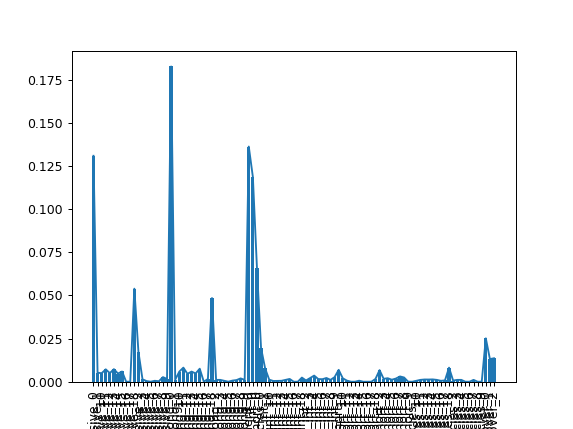

In [34]:
plt.plot([key for key in regimeAmounts.keys()],[val for val in regimeAmounts.values()])

In [35]:
plt.bar(range(len(regimeAmounts)), list(regimeAmounts.values()), align='center')
plt.xticks(range(len(regimeAmounts)), list(regimeAmounts.keys()),rotation="vertical")

([<matplotlib.axis.XTick at 0x7f95668827f0>,
 [Text(0, 0, 'SimOpt_extensive_0'),
  Text(1, 0, 'SimOpt_extensive_1'),
  Text(2, 0, 'SimOpt_extensive_10'),
  Text(3, 0, 'SimOpt_extensive_11'),
  Text(4, 0, 'SimOpt_extensive_12'),
  Text(5, 0, 'SimOpt_extensive_13'),
  Text(6, 0, 'SimOpt_extensive_14'),
  Text(7, 0, 'SimOpt_extensive_15'),
  Text(8, 0, 'SimOpt_extensive_16'),
  Text(9, 0, 'SimOpt_extensive_17'),
  Text(10, 0, 'SimOpt_extensive_18'),
  Text(11, 0, 'SimOpt_extensive_2'),
  Text(12, 0, 'SimOpt_extensive_3'),
  Text(13, 0, 'SimOpt_extensive_4'),
  Text(14, 0, 'SimOpt_extensive_5'),
  Text(15, 0, 'SimOpt_extensive_6'),
  Text(16, 0, 'SimOpt_extensive_7'),
  Text(17, 0, 'SimOpt_extensive_8'),
  Text(18, 0, 'SimOpt_extensive_9'),
  Text(19, 0, 'SimOpt_extensive_long_0'),
  Text(20, 0, 'SimOpt_extensive_long_1'),
  Text(21, 0, 'SimOpt_extensive_long_10'),
  Text(22, 0, 'SimOpt_extensive_long_11'),
  Text(23, 0, 'SimOpt_extensive_long_12'),
  Text(24, 0, 'SimOpt_extensive_long_13'

## Export data as csv
- Solution_alldata contains the optimal regime per stand AND the timely development of indicator values plus all other input columns (represented_are_by_NFIplot, region, NUTS2)
- Solution contains only the selected optimal regime and its share (if multiple regimes per stand are selected)

In [36]:
try:
    os.mkdir("results")
except FileExistsError:
    pass
b = []
c = []
for key in mfo.regimesDecision.keys():
    if mfo.regimesDecision[key].solution_value() > 0:
        b = b+ [(key[0],x*5+2012, key[1]) for x in range(0,21)]
        c = c+ [(key[0],key[1],mfo.regimesDecision[key].solution_value())]
data2b = mfo.data.iloc[mfo.data.index.isin(b)]
data2b.to_csv("./results/"+scenario+"_"+RCP+"_data.csv")
c1 = pd.DataFrame(c)
c1.to_csv("./results/"+scenario+"_"+RCP+"_solutions.csv")

## Export objective ranges

Save as json file

In [37]:
import json
mfo.objectiveRanges

with open('./results/objectiveRanges_'+scenario+'_'+RCP+'.json', 'w') as json_file:
  json.dump(mfo.objectiveRanges, json_file)

Save as CSV.

In [38]:
df = pd.read_json('./results/objectiveRanges_'+scenario+'_'+RCP+'.json')

df.to_csv('./results/objectiveRanges_'+scenario+'_'+RCP+'.csv')

## Export objective values
The optimal solution for each objective.

In [39]:
with open("./results/objectiveValues_"+scenario+"_"+RCP+".csv","w") as file:
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+objName)
        delim = ","
    file.write("\n")
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+str(mfo.objective[objName].solution_value()))
        delim = ","
    file.write("\n")